# Project Exploration
## The Dataset and What we hope to do with it
- The dataset we are using is the 2015 Human Development Index, taken from Kaggle.

In [80]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression
import sklearn
import numpy as np

gd_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\gender_development.csv")
gi_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\gender_inequality.csv")
hd_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\human_development.csv")
ia_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\inequality_adjusted.csv")
hi_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\historical_index.csv")

mpi_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\New folder\\multidimensional_poverty.csv")

In [42]:
##Concatinate all the data from these
##MPI found differently so not concatinated
whole_data = pd.concat([gd_data, gi_data,hd_data,ia_data,hi_data],axis=1,sort=False, copy = True)

Concatinate all the data from the different files on Kaggle, to use together. MPI found differently so not concatinated

In [43]:
##Exploration of GDI/ HDI data
whole_data.head()

,GDI Rank,Country,Gender Development Index (GDI),Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),...,Income Inequality (Gini Coefficient),HDI Rank,Country,Human Development Index (1990),Human Development Index (2000),Human Development Index (2010),Human Development Index (2011),Human Development Index (2012),Human Development Index (2013),Human Development Index (2014)
0,1.0,Norway,0.996,0.94,0.944,83.6,79.5,18.2,16.8,12.7,...,26.8,1.0,Norway,0.849,0.917,0.940,0.941,0.942,0.942,0.944
1,2.0,Australia,0.976,0.922,0.945,84.5,80.3,20.7,19.7,13.1,...,34.0,2.0,Australia,0.865,0.898,0.927,0.930,0.932,0.933,0.935
2,3.0,Switzerland,0.95,0.898,0.945,85,80.8,15.7,15.9,11.5,...,32.4,3.0,Switzerland,0.831,0.888,0.924,0.925,0.927,0.928,0.930
3,4.0,Denmark,0.977,0.912,0.934,82.2,78.3,19.3,18.1,12.8,...,26.9,4.0,Denmark,0.799,0.862,0.908,0.920,0.921,0.923,0.923
4,5.0,Netherlands,0.947,0.893,0.943,83.3,79.7,18,17.9,11.6,...,28.9,5.0,Netherlands,0.829,0.877,0.909,0.919,0.920,0.920,0.922


Problem: How do we remove the repeated columns?

Potential solution: Drop country to avoid biases, they can be identfied by GDI rank 

Also preparing to drop all ".." values for NaN

In [1]:
data = whole_data.drop("Country",axis=1)
data = whole_data.drop("Human Development Index (HDI)",axis=1)
df = pd.DataFrame(data)

NameError: name 'whole_data' is not defined

In [45]:
##Checking the data was entered correctly by exporting to a CSV 
##data.to_csv('x.csv')
## Change ".." to NaN
for i in df:
    for j in range(len(df[i])):
        #Column at Human Development Index (HDI) is a dataframe?
        if type(df[i]) == pd.core.frame.DataFrame:
            #df[i] = df[i].astype(str)
            continue
        if (df[i][j] == ".." or df[i][j] == "..."):
            df[i][j] = None
            

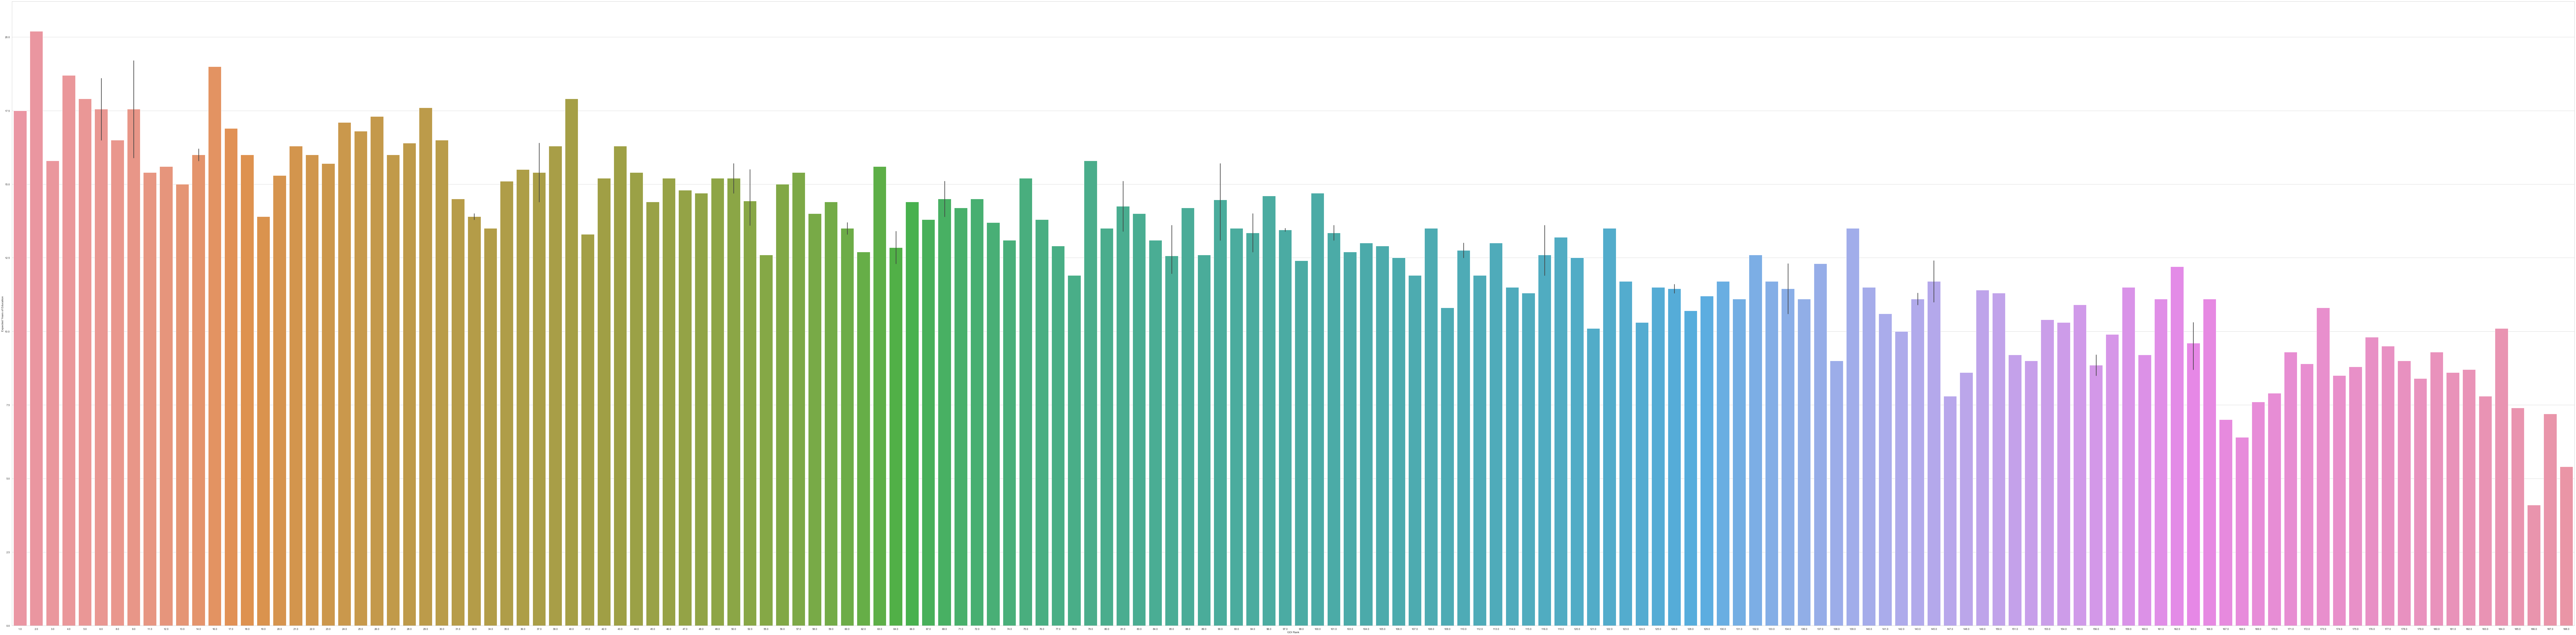

In [46]:
##Some Example Plots 
sb.set(style="whitegrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=data['GDI Rank'], y=data['Expected Years of Education'])

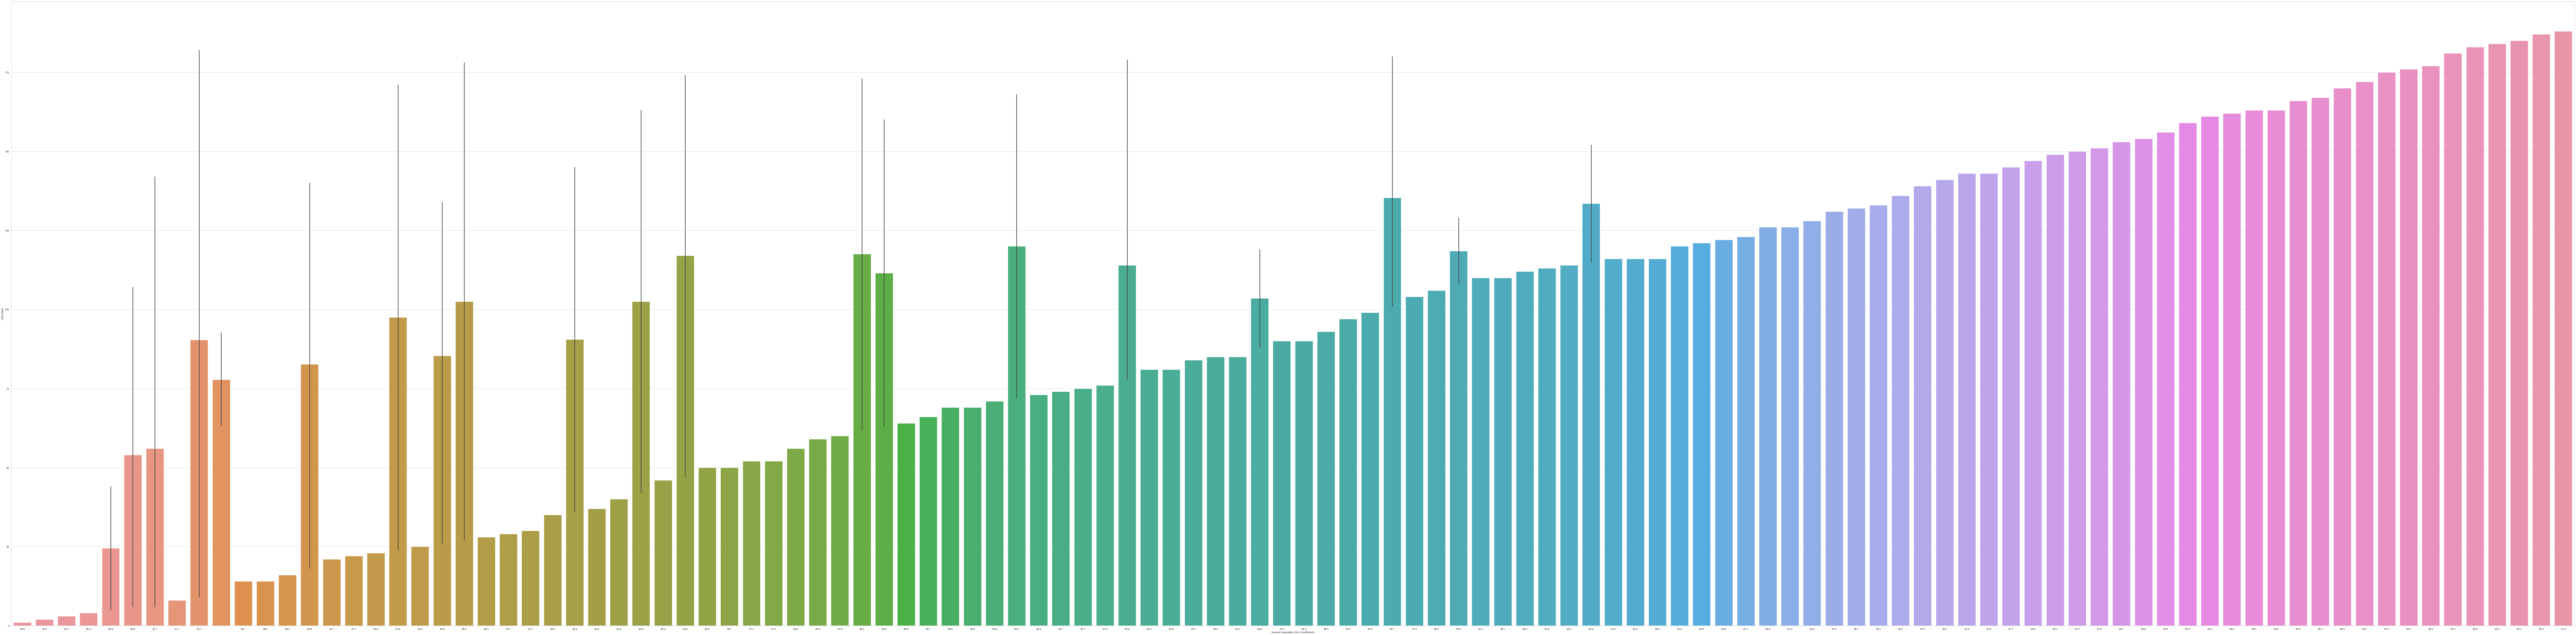

In [47]:
sb.set(style="whitegrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=data['Income Inequality (Gini Coefficient)'], y=data['GDI Rank'])

In [48]:
## Exploration of MPI Data 
mpi_data.head()

,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,Afghanistan,2010/2011 M,0.293,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,..
1,Albania,2008/2009 D,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
2,Argentina,2005 N,0.015,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,..,1.4
3,Armenia,2010 D,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,2006 D,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3


In [49]:
##For Our purposes, delete the year and survey data as it is not relevent 
mpi_data =mpi_data.drop("Year and Survey", axis =1)
mpi_data.describe()

,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards
count,101.000000,101.000000,99.000000,99.000000,101.000000,101.000000,101.000000,101.000000
mean,0.170149,32.599010,0.172949,32.497980,45.852475,25.306931,38.507921,36.189109
std,0.169847,29.718097,0.176056,29.931844,7.588631,11.511214,19.097983,14.060227
min,0.001000,0.400000,0.000000,0.000000,33.700000,1.500000,12.600000,2.600000
25%,0.015000,3.700000,0.015000,3.900000,39.100000,17.900000,25.700000,29.400000
50%,0.127000,26.900000,0.119000,27.200000,45.100000,26.400000,30.400000,40.000000
75%,0.290000,55.600000,0.309500,58.250000,50.800000,33.700000,47.100000,46.400000
max,0.584000,89.800000,0.605000,91.100000,65.000000,54.700000,95.900000,56.600000


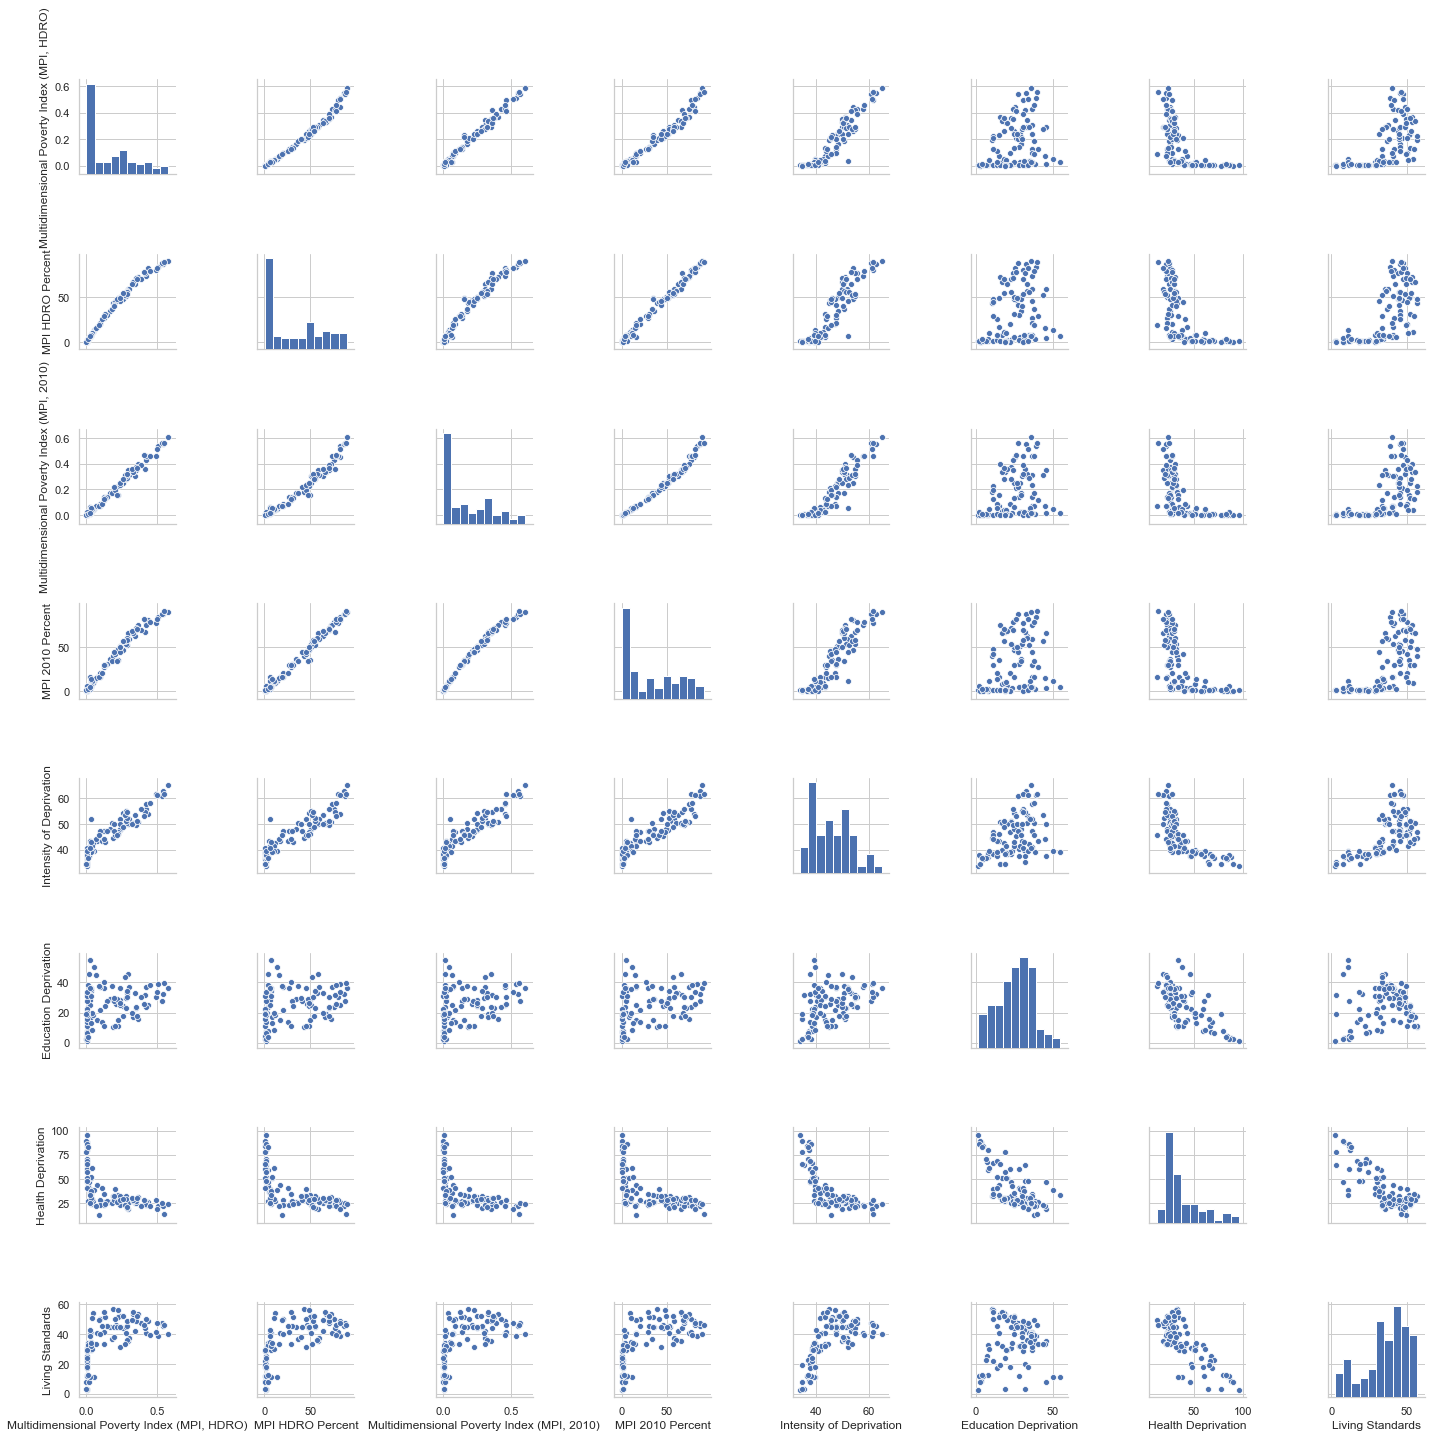

In [50]:
sb.pairplot(mpi_data)
###Strong Positive Correlation between MPI and Intensity of Depravity, 

In [51]:
sb.set(style="dark")

plt.figure(figsize=(400, 100))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Intensity of Deprivation'])

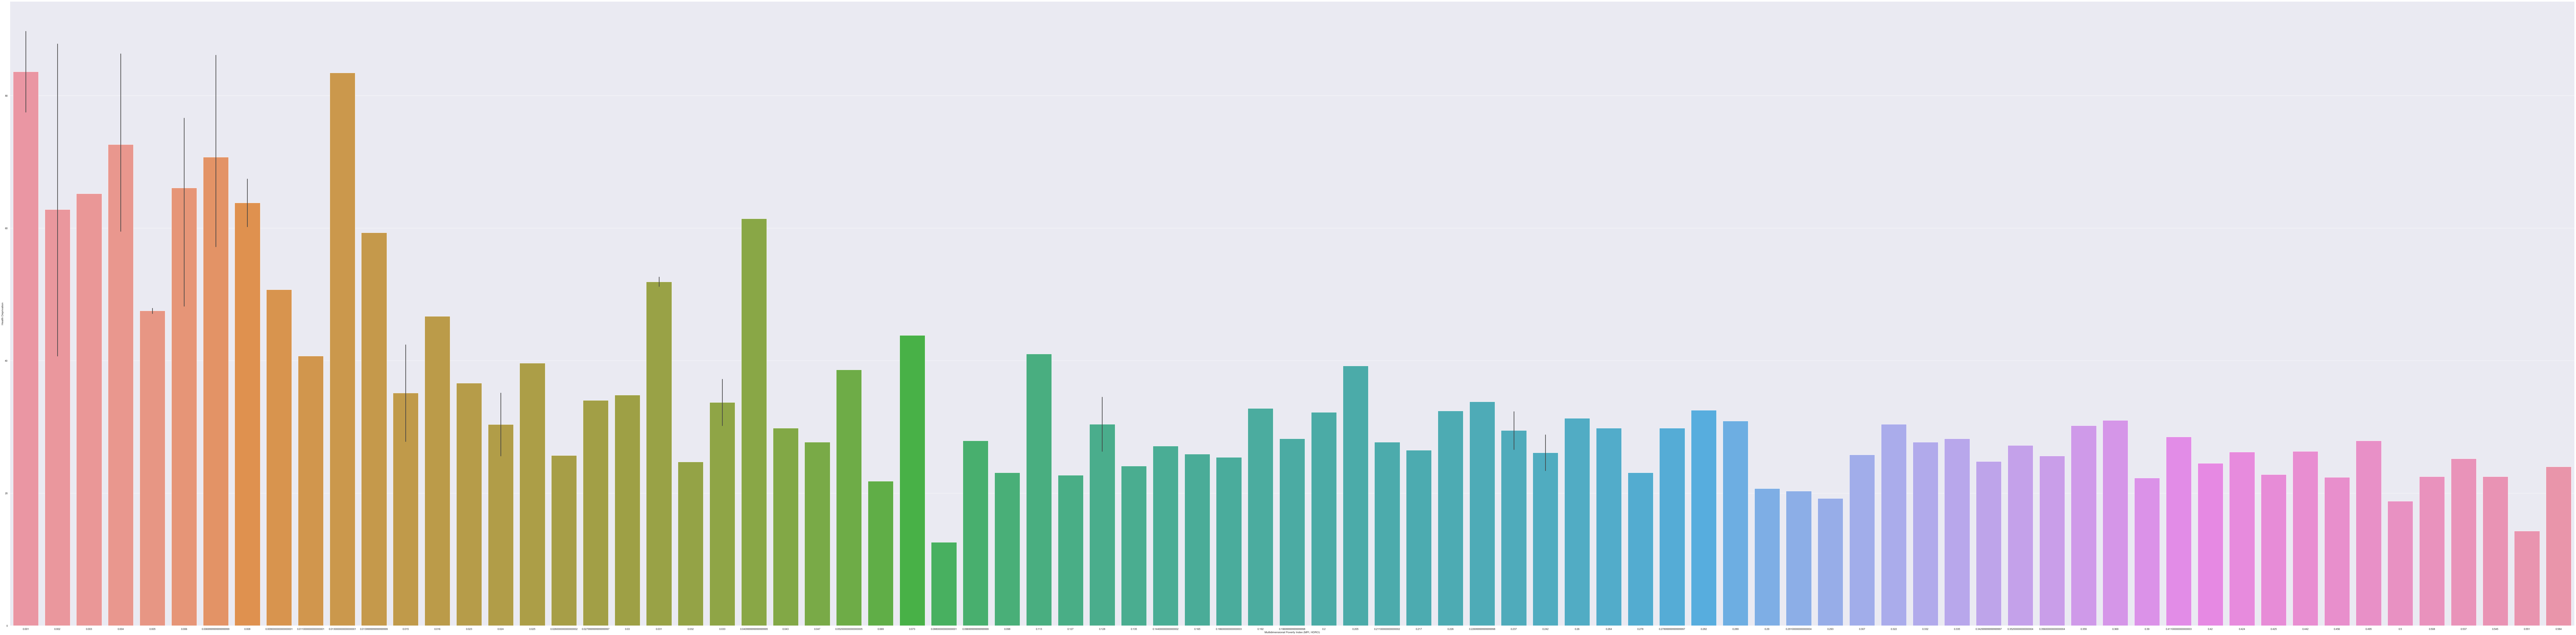

In [52]:
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Health Deprivation'])

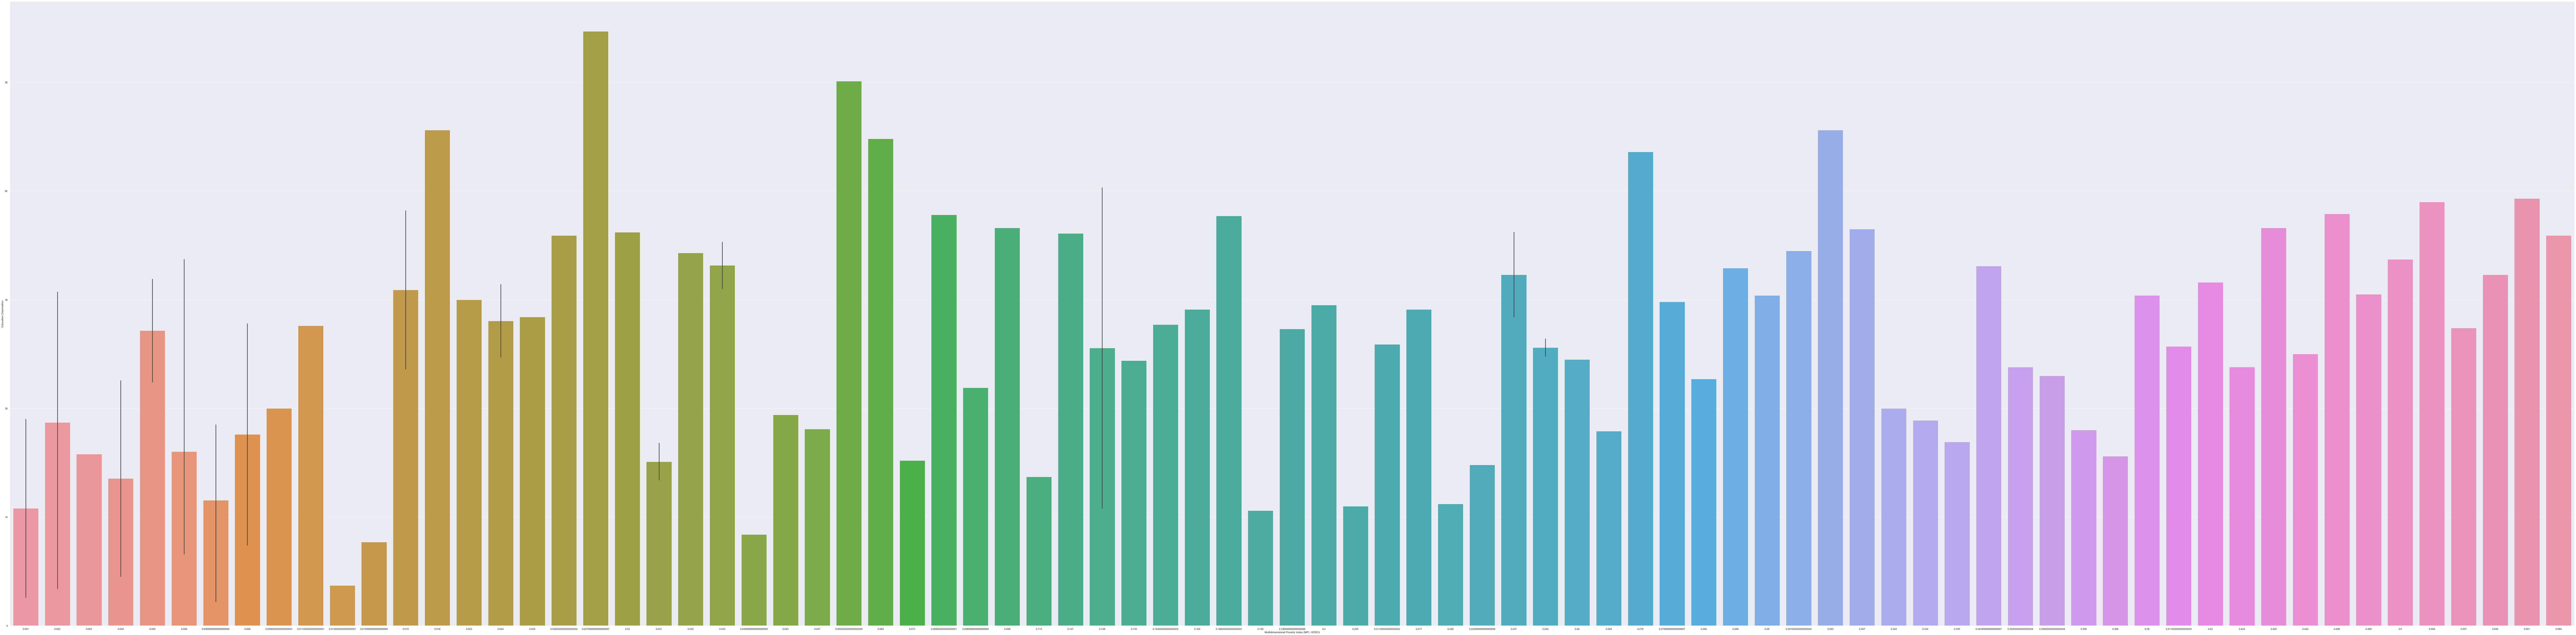

In [53]:
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Education Deprivation'])

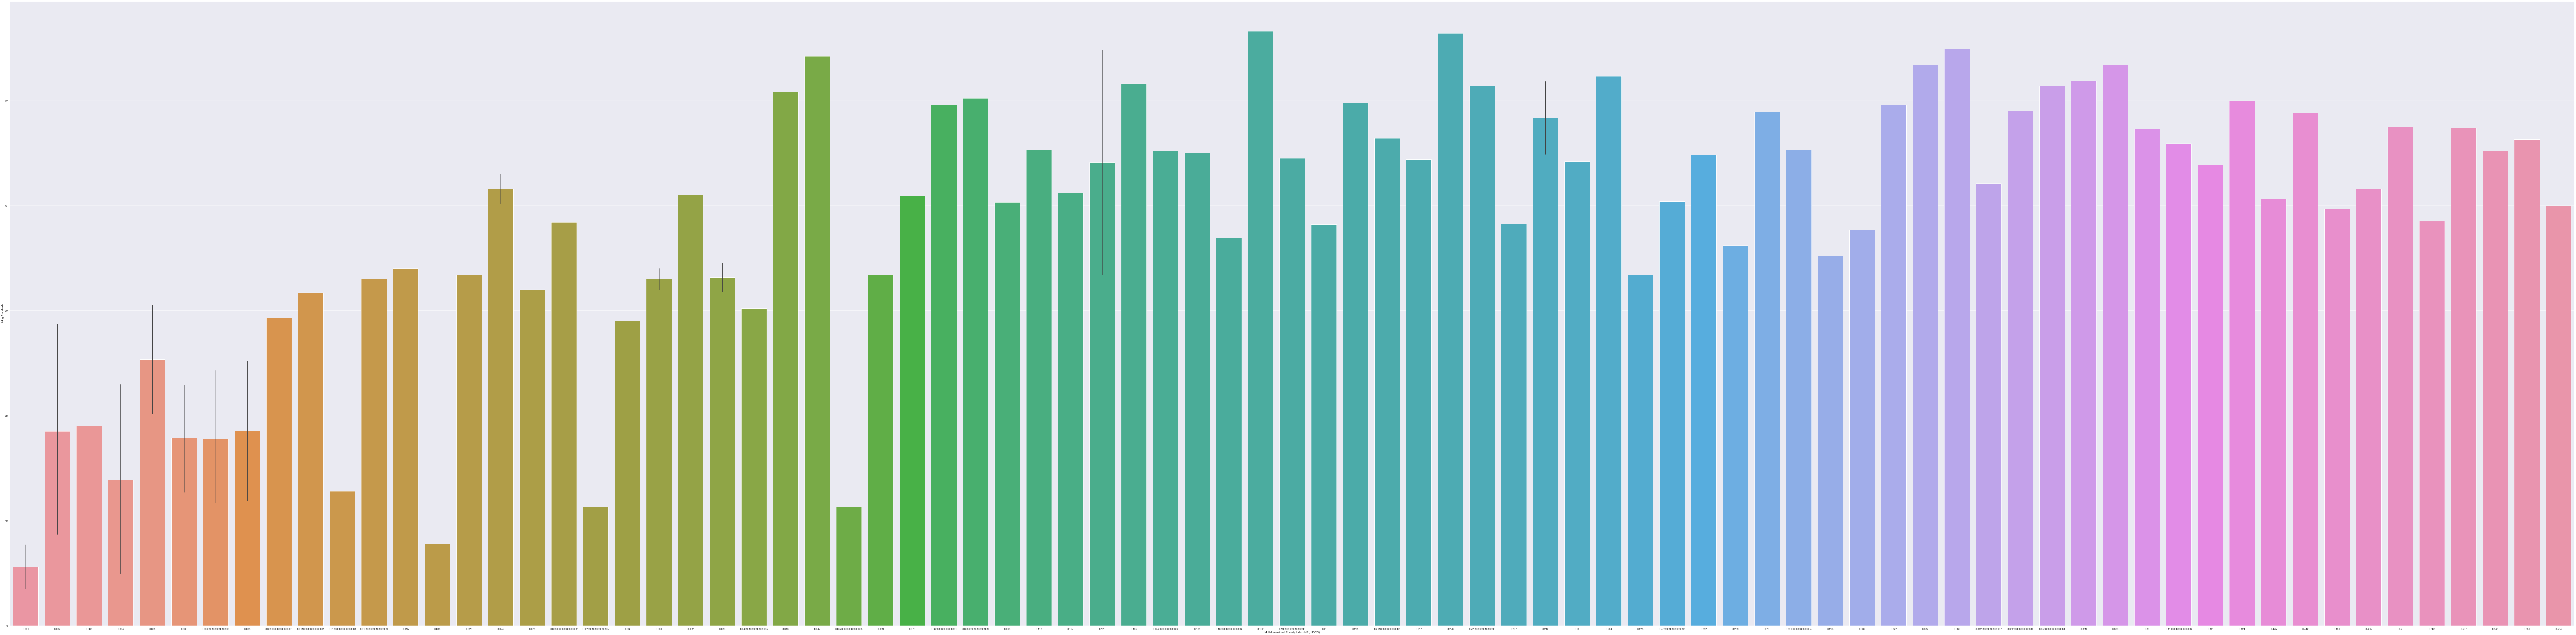

In [54]:
### Exploring the interactions between the MPI and GDI/HDI datasets
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Living Standards'])

In [55]:
#Change ".." to NaN value
for i in mpi_data:
    for j in range(len(mpi_data[i])):
        if (mpi_data[i][j] == ".." or mpi_data[i][j] == "..."):
            mpi_data[i][j] = None
            
mpi_data.head()

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Country,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,Afghanistan,0.293,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,None
1,Albania,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
2,Argentina,0.015,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,None,1.4
3,Armenia,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3


In [56]:
### This is for later so that we can fill in NaN rows 
### This is the next step here

,Country,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
1,Albania,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
3,Armenia,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3
5,Bangladesh,0.237,49.5,0.253,51.3,"75,610",47.8,28.4,26.6,44.9,31.5,43.3
7,Belarus,0.001,0.4,0.000,0.0,41,34.5,2.6,89.7,7.7,5.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92,Tunisia,0.006,1.5,0.004,1.2,161,39.3,33.7,48.2,18.1,15.5,0.7
93,Uganda,0.359,70.3,0.367,69.9,"24,712",51.1,18.0,30.2,51.9,19.5,37.8
94,Ukraine,0.001,0.4,0.004,1.2,162,34.5,19.0,77.5,3.5,8.4,0.0
97,Viet Nam,0.026,6.4,0.017,4.2,"5,796",40.7,35.9,25.7,38.4,17.2,2.4


In [40]:
#sb.heatmap(drop_mpi_data.drop("Country", axis=1))

In [60]:
##Label Encoding on Country Names:
label_encoder = sklearn.preprocessing.LabelEncoder()
mpi_data['Country']= label_encoder.fit_transform(mpi_data['Country']) 

In [62]:
## This eliminates personal bias as well as making it easier to process later
mpi_data

,Country,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,0,0.293,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,None
1,1,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
2,2,0.015,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,None,1.4
3,3,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
4,4,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,0.135,31.2,0.129,30.1,69,43.1,24.4,24.1,51.6,None,None
97,97,0.026,6.4,0.017,4.2,"5,796",40.7,35.9,25.7,38.4,17.2,2.4
98,98,0.200,40.0,NaN,NaN,"9,754",50.1,29.5,32.2,38.2,34.8,9.8
99,99,0.264,54.4,0.281,56.6,"8,173",48.6,17.9,29.8,52.3,60.5,74.3


In [91]:
#Drop Country to compare based on other features 
drp_cntry_mpi_data = mpi_data.drop(["Country","Year and Survey"], axis =1)
correlations =drp_cntry_mpi_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(150, 150))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(drp_cntry_mpi_data), fontsize=40)
ax.set_yticklabels(list(drp_cntry_mpi_data),fontsize=35)
plt.show()